In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats #İstatistik Kütüphanesi
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.naive_bayes import GaussianNB , BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("market_basket_dataset.csv")

In [3]:
df.head()

,BillNo,Itemname,Quantity,Price,CustomerID
0,1000,Apples,5,8.30,52299
1,1000,Butter,4,6.06,11752
2,1000,Eggs,4,2.66,16415
3,1000,Potatoes,4,8.10,22889
4,1004,Oranges,2,7.26,52255


In [4]:
df.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Price         0
CustomerID    0
dtype: int64

In [5]:
df.describe()

,BillNo,Quantity,Price,CustomerID
count,500.000000,500.000000,500.000000,500.000000
mean,1247.442000,2.978000,5.617660,54229.800000
std,144.483097,1.426038,2.572919,25672.122585
min,1000.000000,1.000000,1.040000,10504.000000
25%,1120.000000,2.000000,3.570000,32823.500000
50%,1246.500000,3.000000,5.430000,53506.500000
75%,1370.000000,4.000000,7.920000,76644.250000
max,1497.000000,5.000000,9.940000,99162.000000


In [6]:
df.shape

(500, 5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apples'),
  Text(1, 0, 'Butter'),
  Text(2, 0, 'Eggs'),
  Text(3, 0, 'Potatoes'),
  Text(4, 0, 'Oranges'),
  Text(5, 0, 'Milk'),
  Text(6, 0, 'Onions'),
  Text(7, 0, 'Cereal'),
  Text(8, 0, 'Tomatoes'),
  Text(9, 0, 'Bananas'),
  Text(10, 0, 'Pasta'),
  Text(11, 0, 'Bread'),
  Text(12, 0, 'Coffee'),
  Text(13, 0, 'Sugar'),
  Text(14, 0, 'Chicken'),
  Text(15, 0, 'Cheese'),
  Text(16, 0, 'Tea'),
  Text(17, 0, 'Yogurt'),
  Text(18, 0, 'Juice')])

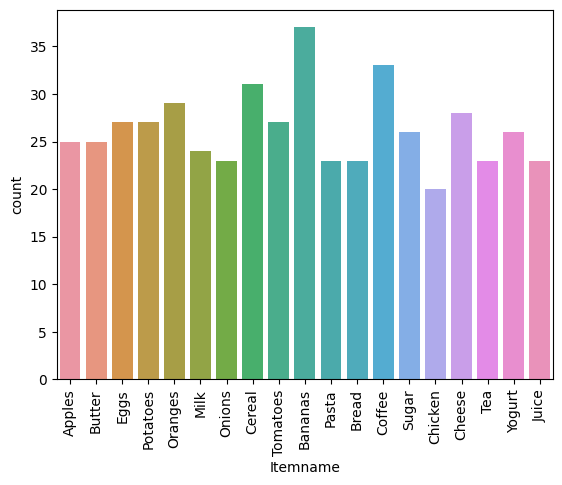

In [14]:
fig = sns.countplot(df, x='Itemname')
plt.xticks(rotation=90) 

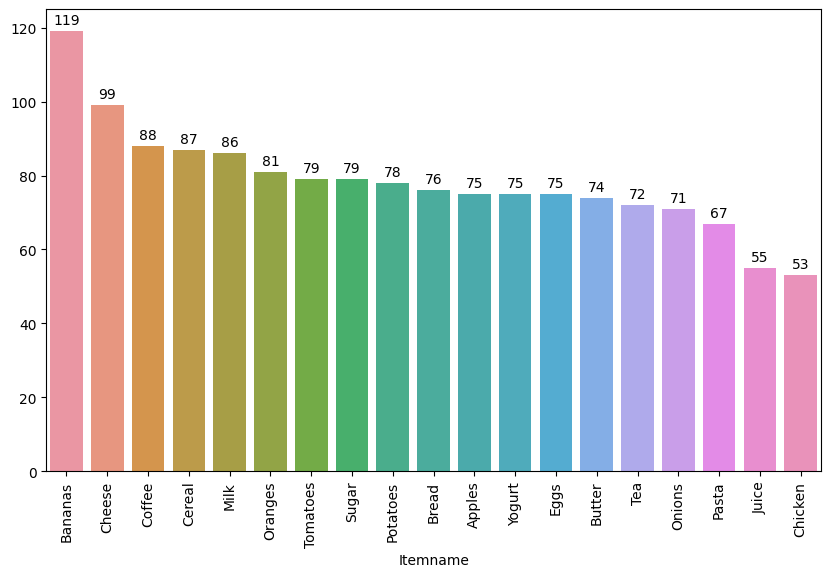

In [18]:
# Calculate item popularity
item_popularity = df.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)

# Seaborn barplot ile görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=item_popularity.index, y=item_popularity.values)

# Her bir çubuğun üstüne toplam miktarı yazdırma
for i, value in enumerate(item_popularity):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.xticks(rotation=90) 
# Grafiği göster
plt.show()

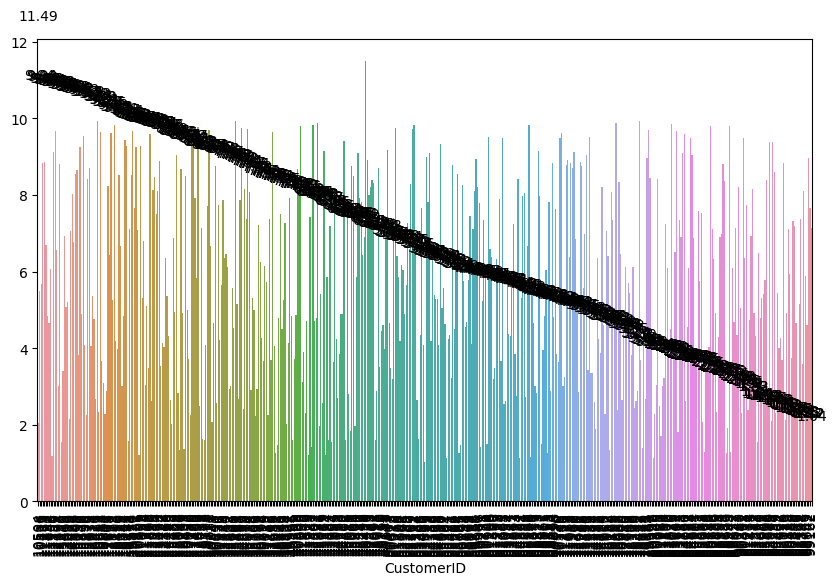

In [20]:
# Calculate Total sell customer popularity
customer_popularity = df.groupby('CustomerID')['Price'].sum().sort_values(ascending=False)

# Seaborn barplot ile görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_popularity.index, y=customer_popularity.values)

# Her bir çubuğun üstüne toplam miktarı yazdırma
for i, value in enumerate(customer_popularity):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.xticks(rotation=90) 
# Grafiği göster
plt.show()